# Mineração de dados - Laboratório 1
**Nome:** Pedro Henrique Duarte **RA:** 812112

## Classificação

1. Importar bibliotecas necessárias

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

2. Carregar o dataset salvo e separar as variáveis explicativas e alvo

In [ ]:

df = pd.read_csv("/content/dataset.csv")

X=df[["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]]
Y=df["y"]


In [ ]:
sum(df["y"])/len(df["y"])

0.114

3. Dividir em treino e teste utilizando o stratify para manter o desbalanceamento

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=123)

4. Treinar modelo de regressão logística

In [ ]:
modelo=LogisticRegression()
modelo.fit(X_train,y_train)

LogisticRegression()

5. Gerar previsões com threshold 0.5

In [ ]:
y_proba=modelo.predict_proba(X_test)[:,1]
y_pred=(y_proba>=0.5).astype(int)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
print(sum(y_pred==1))
print(sum(y_test==1))

24
34


6. Construir matriz de confusão. A partir da matriz, os alunos devem calcular manualmente: acurácia, precisão, recall e F1-score

In [ ]:
matriz=confusion_matrix(y_test,y_pred)
print("Matriz de Confusão:")
print(matriz)
acuracia=(matriz[0,0]+matriz[1,1])/len(y_test)
recall=matriz[1,1]/(matriz[1,1]+matriz[1,0])
precisao=matriz[1,1]/(matriz[1,1]+matriz[0,1])
f1_score=2*(precisao*recall/(precisao+recall))
print(f"Recall: {recall}")
print(f"Acurácia: {acuracia}")
print(f"Precisão: {precisao}")
print(f"F1-Score: {f1_score}")

Matriz de Confusão:
[[264   2]
 [ 20  14]]
Recall: 0.4117647058823529
Acurácia: 0.9266666666666666
Precisão: 0.875
F1-Score: 0.56


7. Plotar curva ROC e calcular AUC

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_proba)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR (Taxa de Falsos Positivos)")
plt.ylabel("TPR (Revocação)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

8. Desafio: encontrar o melhor threshold com base no F1-score.

a) Crie uma lista de thresholds entre 0 e 1

b) Para cada threshold, calcule as previsões binárias e a matriz de confusão

c) A partir da matriz, calcule manualmente:
  - precisão
  - recall   
  - f1       

d) Guarde o F1-score para cada threshold

e) Plote o gráfico do F1-score em função do threshold. Isso ajuda a visualizar qual valor produz o melhor equilíbrio entre precisão e recall

f) Escolha o melhor threshold e refaça a matriz de confusão final

<ipython-input-20-f7e9300ef5a4>:9: RuntimeWarning: invalid value encountered in scalar divide
  precisao=matriz[1,1]/(matriz[1,1]+matriz[0,1])
<ipython-input-20-f7e9300ef5a4>:9: RuntimeWarning: invalid value encountered in scalar divide
  precisao=matriz[1,1]/(matriz[1,1]+matriz[0,1])
<ipython-input-20-f7e9300ef5a4>:9: RuntimeWarning: invalid value encountered in scalar divide
  precisao=matriz[1,1]/(matriz[1,1]+matriz[0,1])
<ipython-input-20-f7e9300ef5a4>:9: RuntimeWarning: invalid value encountered in scalar divide
  precisao=matriz[1,1]/(matriz[1,1]+matriz[0,1])
<ipython-input-20-f7e9300ef5a4>:9: RuntimeWarning: invalid value encountered in scalar divide
  precisao=matriz[1,1]/(matriz[1,1]+matriz[0,1])
<ipython-input-20-f7e9300ef5a4>:9: RuntimeWarning: invalid value encountered in scalar divide
  precisao=matriz[1,1]/(matriz[1,1]+matriz[0,1])
<ipython-input-20-f7e9300ef5a4>:9: RuntimeWarning: invalid value encountered in scalar divide
  precisao=matriz[1,1]/(matriz[1,1]+matriz[0,1])

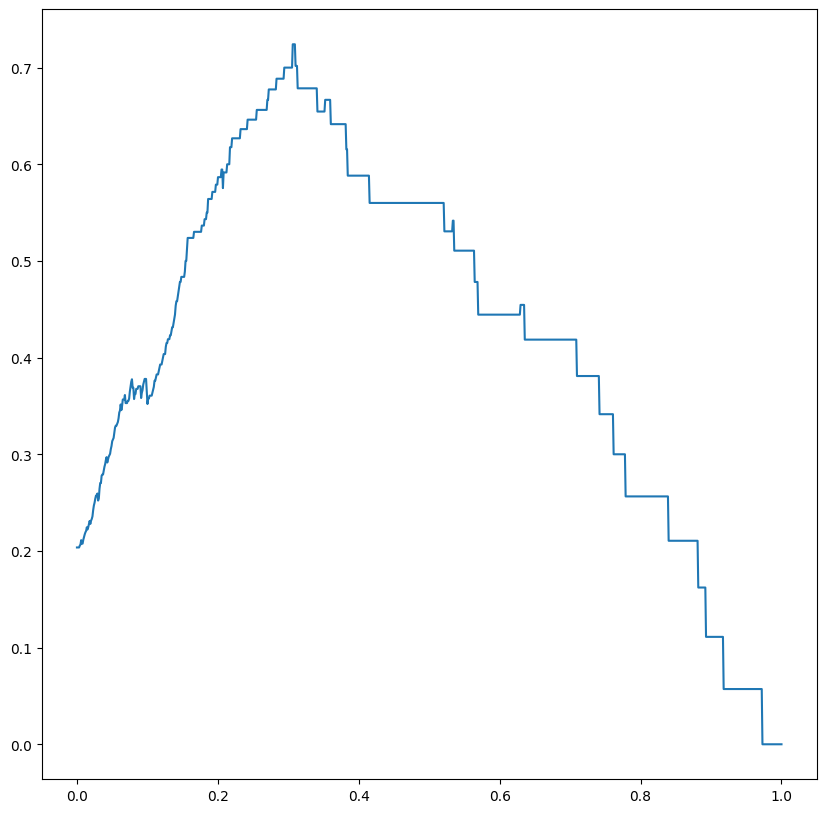

306
0.7241
0.3063063063063063


In [ ]:
thresholds=np.linspace(0,1,1000)
f1_score=[]
a=[]
indice=0
for i in thresholds:
  y_pred=(y_proba>=i).astype(int)
  matriz=confusion_matrix(y_test,y_pred)
  recall=matriz[1,1]/(matriz[1,1]+matriz[1,0])
  precisao=matriz[1,1]/(matriz[1,1]+matriz[0,1])
  f1_score.append(2*(precisao*recall/(precisao+recall)))
f1_score=np.nan_to_num(f1_score)
plt.figure(figsize=(10,10))
plt.plot(thresholds,f1_score)
plt.show()
print(np.argmax(f1_score))
print(round(f1_score[306],4))

print(thresholds[306])



O melhor threshold é 0.3063, pois ele maximiza a estatística f1-score

In [ ]:
y_pred=(y_proba>=0.3063).astype(int)
matriz=confusion_matrix(y_test,y_pred)
print("Matriz de Confusão:")
print(matriz)
acuracia=(matriz[0,0]+matriz[1,1])/len(y_test)
recall=matriz[1,1]/(matriz[1,1]+matriz[1,0])
precisao=matriz[1,1]/(matriz[1,1]+matriz[0,1])
f1_score=2*(precisao*recall/(precisao+recall))
print(f"Recall: {recall}")
print(f"Acurácia: {acuracia}")
print(f"Precisão: {precisao}")
print(f"F1-Score: {f1_score}")

Matriz de Confusão:
[[263   3]
 [ 13  21]]
Recall: 0.6176470588235294
Acurácia: 0.9466666666666667
Precisão: 0.875
F1-Score: 0.7241379310344829


## Regressão

1. Carregar os dados

In [ ]:
df = pd.read_csv("/content/boston.csv")
X=df[["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","lstat","unkw"]]
Y=df["medv"]
df.head()
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,unkw
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,188.491777
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,166.608150
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,7.957982
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,92.265637
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,143.065415
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,198.949546
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,795.798186


Os dados contêm as seguintes colunas:

- crim: taxa de criminalidade per capita por cidade.
- zn: proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés².
- indus: proporção de acres com negócios não varejistas por cidade.
- chas: variável indicadora do Rio Charles (= 1 se o setor faz fronteira com o rio; 0 caso contrário).
- nox: concentração de óxidos de nitrogênio (partes por 10 milhões).
- rm: número médio de cômodos por residência.
- age: proporção de unidades ocupadas pelos proprietários construídas antes de 1940.
- dis: média ponderada das distâncias até cinco centros de emprego em Boston.
- rad: índice de acessibilidade a rodovias radiais.
- tax: taxa de imposto sobre propriedade com valor total por $10.000.
- ptratio: razão aluno-professor por cidade.
- lstat: percentual da população de menor status socioeconômico.
- unkn: uma variável desconhecida que pode ou não ser útil para o modelo.
- medv: valor mediano das residências ocupadas por proprietários (em milhares de dólares).

Seu objetivo é utilizar as técnicas vistas em sala para aprender uma função para prever medv

2. Visualizar os dados. Use scatterplot para ver a relação entre X e Y

In [ ]:
sns.scatterplot(x=X["crim"],y=Y)

A variável "crim" pode ter relação com a resposta, pois apesar da relação não ser clara, os pontos não estão dispersos aleatoriamente

In [ ]:
sns.scatterplot(x=X["zn"],y=Y)


A variável "zn" não aparenta ter relação com a resposta, os pontos parecem ser aleatórios

In [ ]:
sns.scatterplot(x=X["indus"],y=Y)

Pelo gráfico, a variável "indus" aparenta ser negativamente correlacionada com a variável resposta

In [ ]:
sns.scatterplot(x=X["chas"],y=Y)

A variável "chas" não aparenta ter relação com a resposta, pois os pontos estão dispersos aleatoriamente.

In [ ]:
sns.scatterplot(x=X["nox"],y=Y)

A variável "nox" aparenta ser negativamente correlacionada com a resposta

In [ ]:
sns.scatterplot(x=X["rm"],y=Y)

A variável "rm" aparenta ser positivamente e linearmente correlacionada com a resposta

In [ ]:
sns.scatterplot(x=X["dis"],y=Y)

A variável "dis" aparenta ter uma relação positiva com a resposta

In [ ]:
sns.scatterplot(x=X["age"],y=Y)

A variável "age" não aparenta ter relação com a resposta

In [ ]:
sns.scatterplot(x=X["rad"],y=Y)

A variável "rad" não aparenta ter relação com a resposta, pois os pontos estão dispersos aleatoriamente

In [ ]:
sns.scatterplot(x=X["tax"],y=Y)

A variável "tax" pode ter uma relação negativa com a resposta

In [ ]:
sns.scatterplot(x=X["ptratio"],y=Y)

A variável "ptratio" aparenta ter uma relação negativa com a resposta

In [ ]:
sns.scatterplot(x=X["lstat"],y=Y)

A variável "lstat" possui uma relação negativa com a resposta, aparentemente de forma quadrática

In [ ]:
sns.scatterplot(x=X["unkw"],y=Y)

A variável "unkw" aparenta ter uma relação muito boa com a resposta, contudo, como os pontos não estão dispersos, isso pode indicar que a variável desconhecida foi gerada a partir da resposta, o que pode causar problemas.

3. Separar os dados em treino e teste

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=15)

4. Ajustar modelo de regressão linear

In [ ]:
modelo=LinearRegression()
modelo.fit(X_train,Y_train)

LinearRegression()

5. Fazer previsões e avaliar o modelo com as métricas R² e RMSE

In [ ]:
Y_pred=modelo.predict(X_test)
print(r2_score(Y_test,Y_pred))
print(mean_squared_error(Y_test,Y_pred))

0.977297905332637
1.9238012856547546


6. Repetir os passos com regressão polinomial. Criar PolynomialFeatures com grau 2 ou 3, transformar X, e ajustar o LinearRegression.

In [ ]:
poly2=PolynomialFeatures(degree=2)
X_poly2_train=poly2.fit_transform(X_train)
X_poly2_test=poly2.fit_transform(X_test)
modelo_poly2=LinearRegression()
modelo_poly2.fit(X_poly2_train,Y_train)
Y_pred_poly2=modelo_poly2.predict(X_poly2_test)
print(r2_score(Y_test,Y_pred_poly2))
print(mean_squared_error(Y_test,Y_pred_poly2))

0.9952875739556927
0.3993363350574204


In [ ]:
poly3=PolynomialFeatures(degree=3)
X_poly3_train=poly3.fit_transform(X_train)
X_poly3_test=poly3.fit_transform(X_test)
modelo_poly3=LinearRegression()
modelo_poly3.fit(X_poly3_train,Y_train)
Y_pred_poly3=modelo_poly3.predict(X_poly3_test)
print(r2_score(Y_test,Y_pred_poly3))
print(mean_squared_error(Y_test,Y_pred_poly3))

-11.575881433258802
1065.6944755113805


7. Visualizar os resultados da regressão polinomial:
- Gerar curva de predição para comparar com os dados reais
- Plotar os pontos reais e a curva ajustada pelo modelo

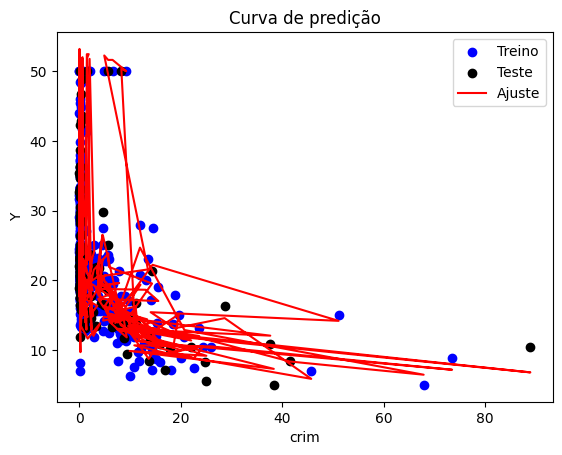

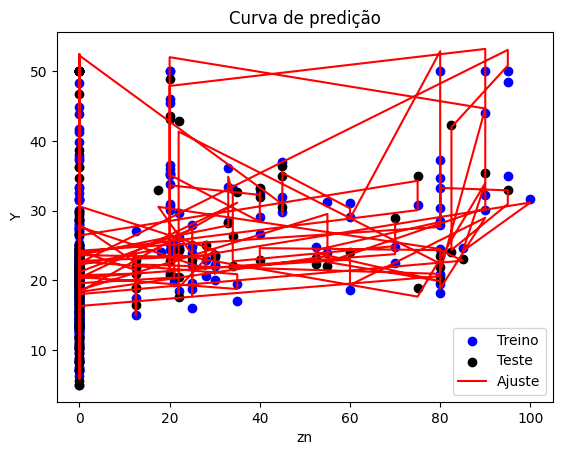

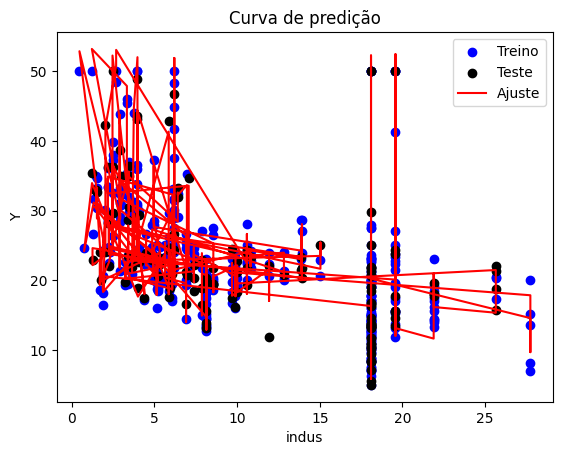

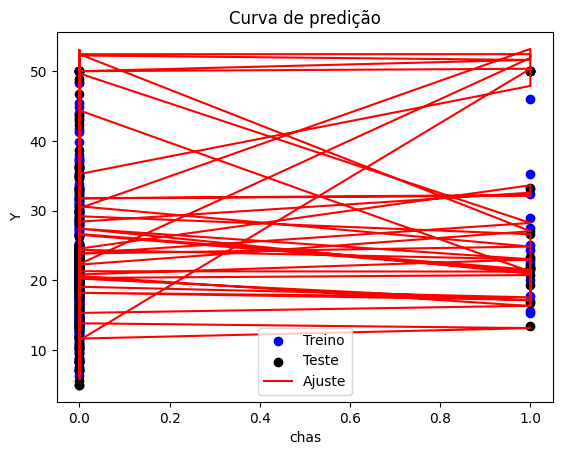

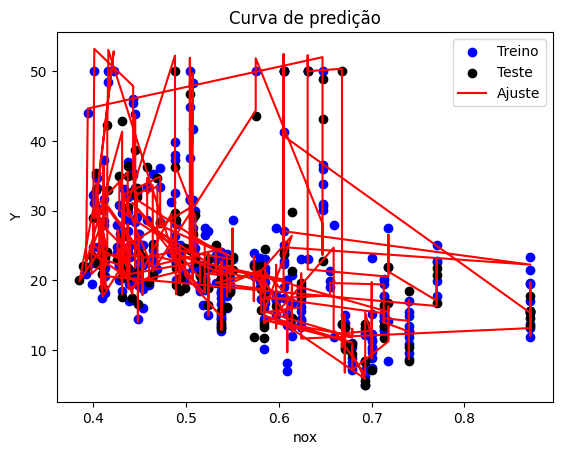

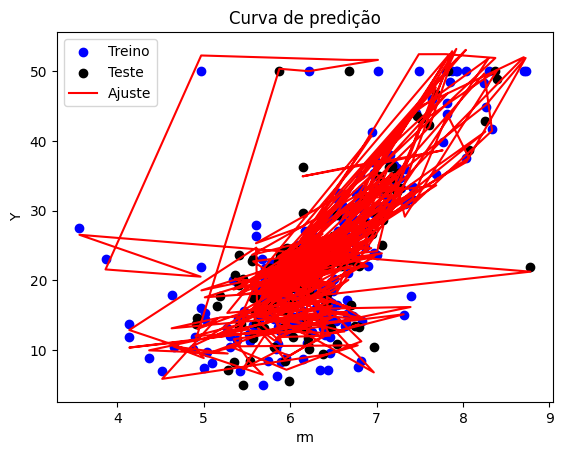

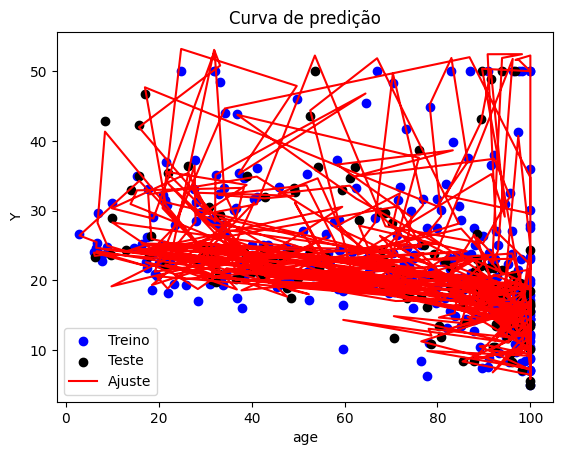

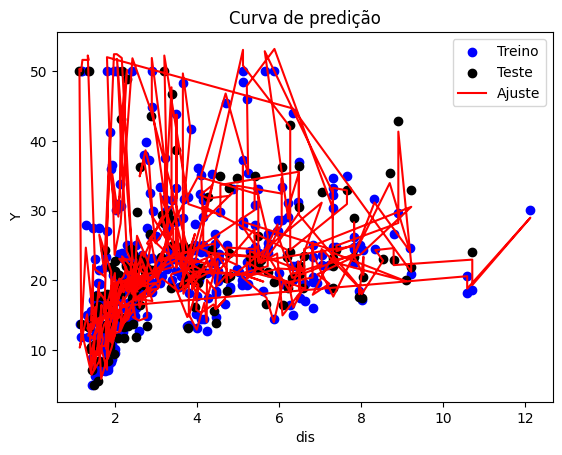

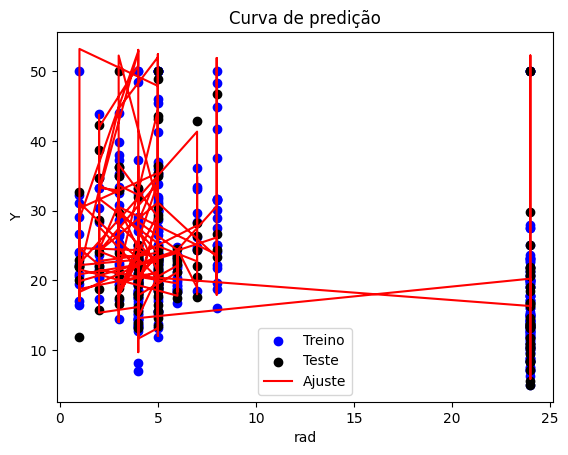

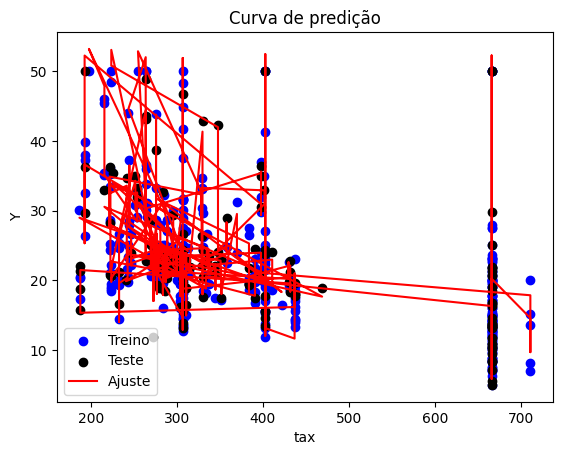

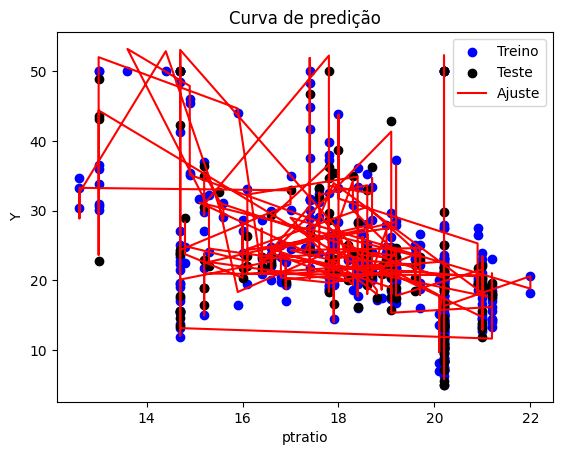

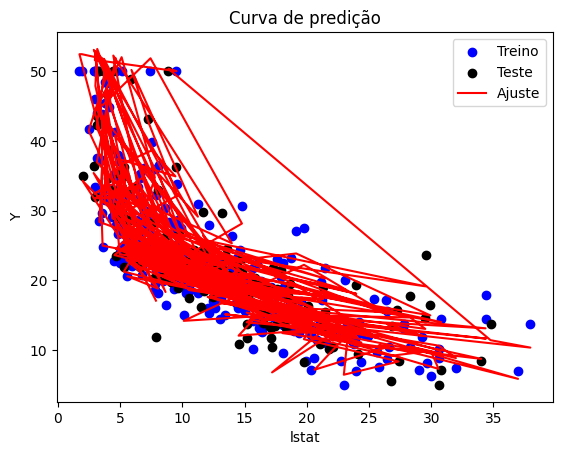

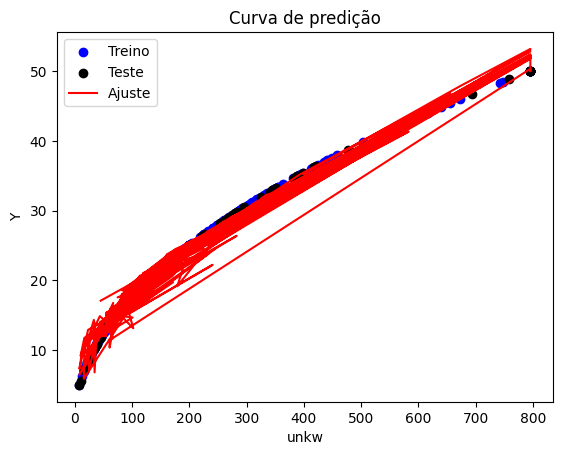

In [ ]:
lista=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","lstat","unkw"]


for i in lista:
  plt.figure()
  plt.scatter(X_train[i], Y_train, color='blue', label="Treino")
  plt.scatter(X_test[i], Y_test, color='black', label="Teste")
  X_plot=X[i]
  Y_plot = modelo.predict(X)

  plt.plot(X_plot, Y_plot, color='red', label=f"Ajuste")
  plt.xlabel(i)
  plt.ylabel("Y")
  plt.title(f"Curva de predição")
  plt.legend()
  plt.show()

# Não consegui fazer o item 7

8. Visualizar os coeficientes do modelo

[-8.49916884e-02 -2.96625584e-05  5.04415883e-03  1.98755788e-01
 -5.35093639e+00 -3.81237439e-01  2.19079011e-03 -1.92233731e-01
  9.98901995e-02 -4.94636570e-03 -1.98153215e-01 -2.29961351e-01
  4.47605650e-02]


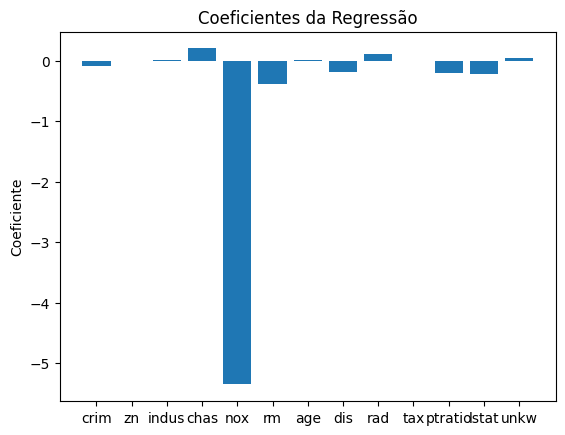

In [ ]:
coeficientes=modelo.coef_
nomes=X.columns
plt.bar(nomes,modelo.coef_)
plt.ylabel("Coeficiente")
plt.title("Coeficientes da Regressão")
print(coeficientes)